<a href="https://colab.research.google.com/github/shakilur-rahman/Fingerprinting/blob/main/MACCS_By_Shakilur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi



     |████████████████████████████████| 22.5 MB 1.4 MB/s 


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys

In [ ]:
class MACCS:
    def __init__(self, smiles):
        self.smiles = smiles
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]

    def compute_MACCS(self, name):
        MACCS_list = []
        header = ['bit' + str(i) for i in range(167)]
        for i in range(len(self.mols)):
            ds = list(MACCSkeys.GenMACCSKeys(self.mols[i]).ToBitString())
            MACCS_list.append(ds)
        df = pd.DataFrame(MACCS_list,columns=header)
        df.insert(loc=0, column='smiles', value=self.smiles)
        df.to_csv(name[:-4]+'_MACCS.csv', index=False)

In [ ]:
! pip install molvs

     |████████████████████████████████| 61 kB 257 kB/s 
  Created wheel for molvs: filename=MolVS-0.1.1-py3-none-any.whl size=32387 sha256=aa7a47d6d48bfd30f03a6a1af4ce372769610a27a63199897c2e304d56df9783
  Stored in directory: /root/.cache/pip/wheels/c4/c2/92/e85190307603c2b3733d43e357abae2d1c66b609bfbba6200d
Successfully built molvs


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np


In [ ]:
smiles_list = ['CC1=C(N=C(C=C1)NC(=O)C2(CC2)C3=CC4=C(C=C3)OC(O4)(F)F)C5=CC(=CC=C5)C(=O)O', 
               'CC(C)C1C(=O)N2CCCC2C3(N1C(=O)C(O3)(C(C)C)NC(=O)C4CC5C(CC6=CNC7=CC=CC5=C67)N(C4)C)O',
               'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F']
mol_list = [ ]
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

 

In [ ]:
import csv

smiles_list = ['CC1=C(N=C(C=C1)NC(=O)C2(CC2)C3=CC4=C(C=C3)OC(O4)(F)F)C5=CC(=CC=C5)C(=O)O', 
               'CC(C)C1C(=O)N2CCCC2C3(N1C(=O)C(O3)(C(C)C)NC(=O)C4CC5C(CC6=CNC7=CC=CC5=C67)N(C4)C)O',
               'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F']

with open('ligands.csv', 'w', newline = '') as csvfile:
  fieldnames = ['smiles']
  

In [ ]:
class MACCS:
    def __init__(self, smiles):
        self.smiles = smiles
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
    def compute_MACCS(self, name):
        MACCS_list = []
        header = ['bit' + str(i) for i in range(167)]
        for i in range(len(self.mols)):
            ds = list(MACCSkeys.GenMACCSKeys(self.mols[i]).ToBitString())
            MACCS_list.append(ds)
        df = pd.DataFrame(MACCS_list,columns=header)
        df.insert(loc=0, column='smiles', value=self.smiles)
        df.to_csv(name[:-4]+'_MACCS.csv', index=False)

In [ ]:
pattern = Chem.MolFromSmiles('F')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))


True
False
True


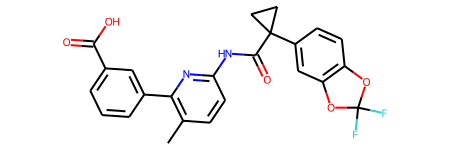

In [ ]:
lumacaftor = mol_list[0]
lumacaftor

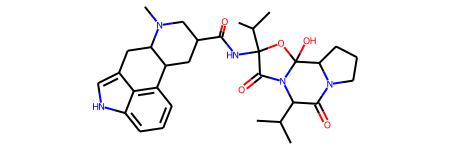

In [ ]:
dihydroergocornine = mol_list[1]
dihydroergocornine

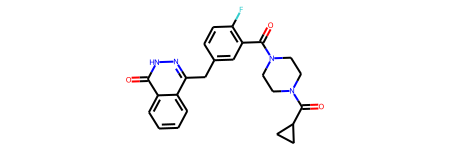

In [ ]:
olaparib = mol_list[2]
olaparib

In [ ]:
from rdkit import Chem

In [ ]:
mol = Chem.MolFromSmiles('CNC(=O)C1=NC=CC(=C1)OC2=CC(=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F)F')

In [ ]:
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)

In [ ]:
print(type(fp))

for i in range(len(fp)):
    print(fp[i], end='')

fp.ToBitString()    # Alternative, easier way to convert it to a bitstring.

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
00000000000000000000000000000000000001000011000000000000000000000100000000000101000000010000110101100001001100101100010001000111000101111100001111100011101011111111110

'00000000000000000000000000000000000001000011000000000000000000000100000000000101000000010000110101100001001100101100010001000111000101111100001111100011101011111111110'

In [ ]:
len(fp)

167

In [ ]:
smiles = [ 'CC1=C(N=C(C=C1)NC(=O)C2(CC2)C3=CC4=C(C=C3)OC(O4)(F)F)C5=CC(=CC=C5)C(=O)O', #Lumacaftor
               'CC(C)C1C(=O)N2CCCC2C3(N1C(=O)C(O3)(C(C)C)NC(=O)C4CC5C(CC6=CNC7=CC=CC5=C67)N(C4)C)O', #Dihydroergocornine
               'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F']     # Olaparib

In [ ]:
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)

In [ ]:
print(type(fp))

for i in range(len(fp)):
    print(fp[i], end='')

fp.ToBitString()    # Alternative, easier way to convert it to a bitstring.

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
00000000000000000000001000000000000000100010000000000000010000100110000010000100000100010011100011100100011100101100010011010100000101111101101011110011101011111111110

'00000000000000000000001000000000000000100010000000000000010000100110000010000100000100010011100011100100011100101100010011010100000101111101101011110011101011111111110'

In [ ]:
import requests
import time

In [ ]:
cids = [    16678941,  # Lumacaftor
          168871,  # Didydroergocornine
         23725625, # Olaparib
        68873, #Drospirenone
        5273648, #Ursadiol
        25145656, #Capmatinib
        6480466, #Delamanid
        24775005, #Sonidegib
        644241, #644241
        11167602] #Regorafenib

In [ ]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

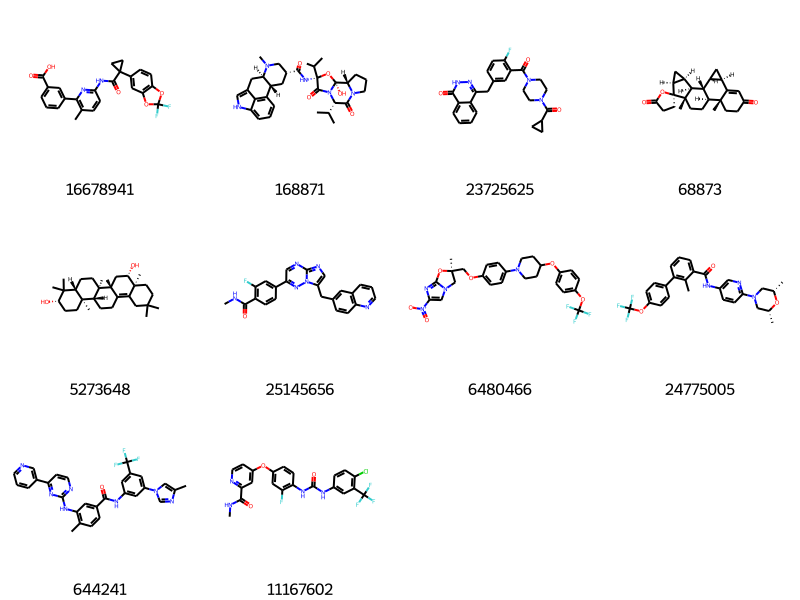

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in cids] )

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fps = [ MACCSkeys.GenMACCSKeys(x) for x in mols ]

In [ ]:
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.80 ):
            print(" ****")
        elif ( score >= 0.70 ):
            print(" ***")
        elif ( score >= 0.60 ):
            print(" **")
        elif ( score >= 0.50 ):
            print(" *")
        else:
            print(" ")

16678941 vs. 168871 : 0.53 *
16678941 vs. 23725625 : 0.455 
16678941 vs. 68873 : 0.31 
16678941 vs. 5273648 : 0.247 
16678941 vs. 25145656 : 0.507 *
16678941 vs. 6480466 : 0.489 
16678941 vs. 24775005 : 0.52 *
16678941 vs. 644241 : 0.547 *
16678941 vs. 11167602 : 0.6 **
168871 vs. 23725625 : 0.53 *
168871 vs. 68873 : 0.367 
168871 vs. 5273648 : 0.359 
168871 vs. 25145656 : 0.398 
168871 vs. 6480466 : 0.536 *
168871 vs. 24775005 : 0.573 *
168871 vs. 644241 : 0.443 
168871 vs. 11167602 : 0.434 
23725625 vs. 68873 : 0.24 
23725625 vs. 5273648 : 0.197 
23725625 vs. 25145656 : 0.554 *
23725625 vs. 6480466 : 0.523 *
23725625 vs. 24775005 : 0.562 *
23725625 vs. 644241 : 0.435 
23725625 vs. 11167602 : 0.465 
68873 vs. 5273648 : 0.6 **
68873 vs. 25145656 : 0.155 
68873 vs. 6480466 : 0.278 
68873 vs. 24775005 : 0.267 
68873 vs. 644241 : 0.159 
68873 vs. 11167602 : 0.214 
5273648 vs. 25145656 : 0.111 
5273648 vs. 6480466 : 0.215 
5273648 vs. 24775005 : 0.24 
5273648 vs. 644241 : 0.13 
5273648 vs.

In [ ]:
print("Tanimoto    :", round(DataStructs.TanimotoSimilarity(fps[0], fps[1]), 4))
print("Dice        :", round(DataStructs.DiceSimilarity(fps[0], fps[1]), 4))
print("Cosine      :", round(DataStructs.CosineSimilarity(fps[0], fps[1]), 4))
print("Sokal       :", round(DataStructs.SokalSimilarity(fps[0], fps[1]), 4))
print("McConnaughey:", round(DataStructs.McConnaugheySimilarity(fps[0], fps[1]), 4))

Tanimoto    : 0.5301
Dice        : 0.6929
Cosine      : 0.6978
Sokal       : 0.3607
McConnaughey: 0.4054
